# Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data

In [ ]:
# Load data labeled dan unlabelled

df = pd.read_csv('/content/drive/MyDrive/Coding-Tesis/6. Final Data Training_ML-AHP.csv')  # labeled
df_unl = pd.read_csv('/content/drive/MyDrive/Coding-Tesis/7. Final Data_unlabeled-AHP-ML.csv')  # unlabeled



In [ ]:
print(df.columns)
print(df_unl.columns)

Index(['X', 'Y', 'LT', 'LD', 'RF', 'SL', 'DD', 'LULC', 'SO', 'AL', 'TWI', 'PC',
       'Yields', 'Class'],
      dtype='object')
Index(['X', 'Y', 'LT', 'LD', 'RF', 'SL', 'DD', 'LULC', 'SO', 'AL', 'TWI',
       'PC'],
      dtype='object')


In [ ]:
df.describe()


,X,Y,LT,LD,RF,SL,DD,LULC,SO,AL,TWI,PC,Yields,Class
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.00000,249.000000,249.000000,249.000000
mean,795972.855422,9.221778e+06,66.087831,59.797114,39.861542,20.696812,20.634217,9.430643,8.081687,10.280201,0.03502,0.046948,7.019478,1.863454
std,15739.712574,8.935262e+03,33.647186,27.298543,10.540429,10.176491,4.050599,2.812512,2.932232,3.612444,0.02052,0.019518,14.000637,0.840884
min,765137.000000,9.202212e+06,32.060000,18.470000,16.500900,9.484106,11.590000,5.160000,3.980000,2.830000,0.02000,0.020000,0.020000,1.000000
25%,780988.000000,9.215688e+06,38.330000,44.420440,42.243210,15.772469,20.180000,5.160000,3.980000,6.050000,0.02000,0.030000,0.410000,1.000000
50%,797065.000000,9.221363e+06,46.820000,44.655880,42.243210,15.772469,20.180000,10.480000,10.180000,9.250000,0.03000,0.050000,1.720000,2.000000
75%,811670.000000,9.224675e+06,92.300000,92.350000,45.457290,23.258385,21.710000,10.480000,10.180000,14.170000,0.03000,0.050000,7.740000,2.000000
max,821103.000000,9.242995e+06,145.360000,92.350000,82.504520,57.350000,39.410000,14.870000,10.960000,14.170000,0.10000,0.100000,120.000000,4.000000


In [ ]:
df_unl.describe()

,X,Y,LT,LD,RF,SL,DD,LULC,SO,AL,TWI,PC
count,1.891248e+06,1.891248e+06,1.891245e+06,1.891245e+06,1.891248e+06,1.891248e+06,1.891248e+06,1.891248e+06,1.891248e+06,1.891248e+06,1.891248e+06,1.891248e+06
mean,7.925551e+05,9.221935e+06,2.408108e+01,6.179150e+01,3.892634e+01,2.449621e+01,2.202504e+01,9.915289e+00,9.153878e+00,9.412251e+00,3.772273e-02,4.904319e-02
std,1.349412e+04,1.157357e+04,9.087355e+00,2.757072e+01,1.396246e+01,1.433230e+01,6.066037e+00,3.335723e+00,2.516567e+00,4.391620e+00,2.590668e-02,2.023986e-02
min,7.614506e+05,9.198472e+06,1.147000e+01,1.847000e+01,1.650090e+01,8.760281e+00,7.881633e+00,5.160000e+00,3.980000e+00,2.833944e+00,1.945512e-02,1.908612e-02
25%,7.824806e+05,9.212512e+06,1.577247e+01,4.442044e+01,2.427070e+01,1.577247e+01,2.017741e+01,5.160000e+00,1.018000e+01,6.047273e+00,1.945512e-02,2.807322e-02
50%,7.925306e+05,9.221242e+06,2.325838e+01,4.465588e+01,4.224321e+01,2.325838e+01,2.017741e+01,1.048000e+01,1.018000e+01,9.252227e+00,2.861598e-02,5.257913e-02
75%,8.024306e+05,9.230932e+06,3.608498e+01,9.235000e+01,4.545729e+01,3.608498e+01,2.171261e+01,1.048000e+01,1.018000e+01,1.416972e+01,5.359567e-02,7.634447e-02
max,8.259206e+05,9.246472e+06,5.735000e+01,9.235000e+01,8.250452e+01,5.735000e+01,3.940816e+01,2.581000e+01,1.989000e+01,1.416972e+01,9.727561e-02,9.543059e-02


# 3. Explorattion Data Analysis

## Cek Null dan Duplicate

In [ ]:
print(df.isnull().sum())
print("Null values in df_unl:")
print(df_unl.isnull().sum())



X         0
Y         0
LT        0
LD        0
RF        0
SL        0
DD        0
LULC      0
SO        0
AL        0
TWI       0
PC        0
Yields    0
Class     0
dtype: int64
Null values in df_unl:
X       0
Y       0
LT      3
LD      3
RF      0
SL      0
DD      0
LULC    0
SO      0
AL      0
TWI     0
PC      0
dtype: int64


In [ ]:
#Hapus Null (Tidak signifikan)
df_unl = df_unl.dropna(subset=['LT', 'LD'])
print(df_unl.isnull().sum())

X       0
Y       0
LT      0
LD      0
RF      0
SL      0
DD      0
LULC    0
SO      0
AL      0
TWI     0
PC      0
dtype: int64


In [ ]:
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")
print("Duplicates in df_unl:")
print(df_unl.duplicated().sum())



Jumlah baris duplikat: 0
Duplicates in df_unl:
0


##Cek Original Data Training

## Multicolinearity Analysis Data Training

In [ ]:
# semua kolom fitur, kecuali Yields, Class, dan koordinat (x dan y)

fitur = df.drop(columns=['X', 'Y', 'Yields', 'Class']) # data training
corr = fitur.corr(method='pearson')


fitur_unl = df_unl.drop(columns=['X', 'Y']) # data prediksi
corr_unl =fitur_unl.corr(method='pearson')

### Heatmap Korelasi Linier (Pearson)

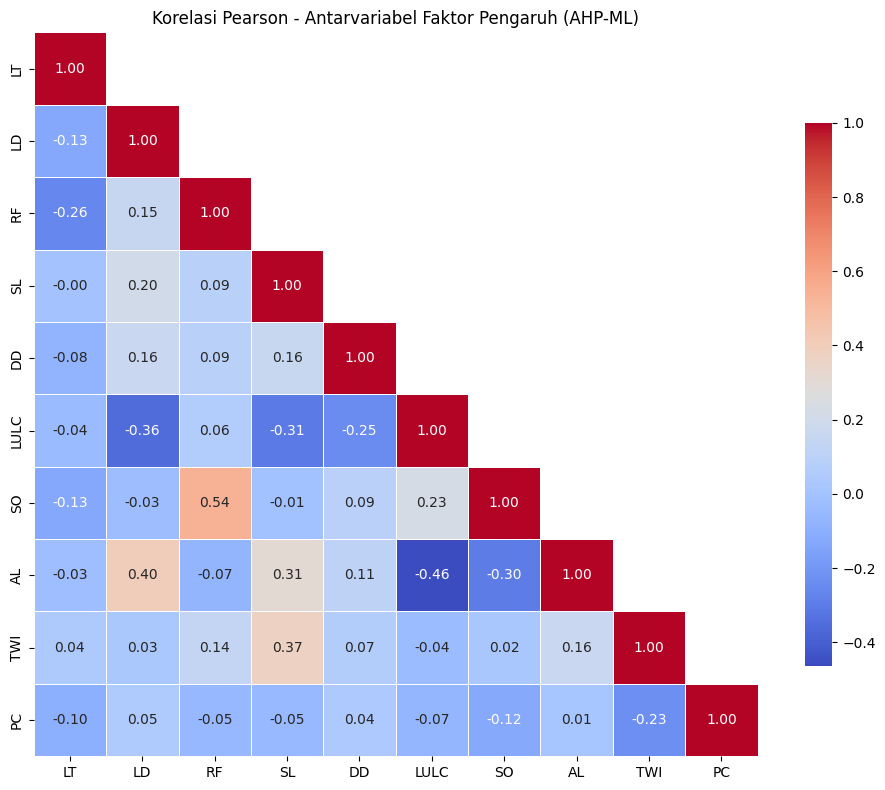

In [ ]:
# Korelasi Pearson - Data Training
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hitung korelasi Pearson - Data Training
corr = fitur.corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Korelasi Pearson - Antarvariabel Faktor Pengaruh (AHP-ML)')
plt.tight_layout()
plt.show()


### VIF (Variance Inflation Factor)- Variabel Independen

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Ambil semua kolom fitur, kecuali Yields dan Class (dan X, Y jika bukan fitur)
fitur = df.drop(columns=['X', 'Y', 'Yields', 'Class'])

scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

# Hitung VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = fitur.columns
vif_df["VIF"] = [variance_inflation_factor(fitur_scaled, i) for i in range(fitur.shape[1])]

# hasil
print(vif_df.sort_values(by="VIF", ascending=False))


  Feature       VIF
6      SO  1.624764
2      RF  1.572779
7      AL  1.554895
5    LULC  1.497656
3      SL  1.339612
1      LD  1.324475
8     TWI  1.276516
0      LT  1.112325
4      DD  1.110895
9      PC  1.091242


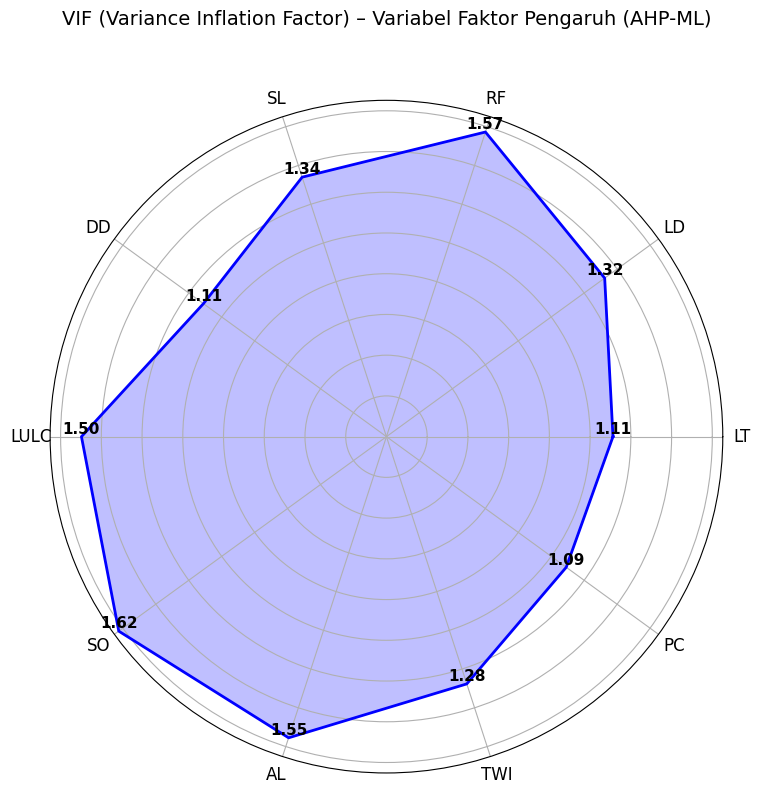

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil data VIF
labels = vif_df['Feature'].values
vif_values = vif_df['VIF'].values

# Sudut untuk setiap fitur
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
vif_values = np.concatenate((vif_values, [vif_values[0]]))  # Tutup lingkaran
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, vif_values, color='b', linewidth=2)
ax.fill(angles, vif_values, color='b', alpha=0.25)
ax.set_yticklabels([])

# Label fitur di sumbu
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# Tambahkan label nilai VIF di ujung garis (sudut spoke)
for i in range(len(labels)):
    angle = angles[i]
    value = vif_values[i]
    ax.text(angle, value, f'{value:.2f}', color='black', fontsize=11,
            ha='center', va='bottom', fontweight='bold')


plt.title('VIF (Variance Inflation Factor) – Variabel Faktor Pengaruh (AHP-ML)', size=14, y=1.1)
plt.tight_layout()
plt.show()


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid lengkap untuk Random Forest
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }}


# Dictionary
best_models_ori = {}
best_params_ori = {}

# Tuning model dengan RandomizedSearchCV ===
for name in ['Random Forest']:
    print(f"\n🔍 Tuning {name} (Original Data)...")

    model = models[name]
    param_dist = param_grids[name]

    search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=30,                   # 30 kombinasi acak
        cv=5,                        # 5-fold cross-validation
        scoring='f1_macro',
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train_ori, y_train_enc_ori)

    best_models_ori[name] = search.best_estimator_
    best_params_ori[name] = search.best_params_

    print(f"✅ Best Parameters for {name} (Original): {search.best_params_}")
    print(f"📈 Best F1 Macro Score (CV): {search.best_score_:.4f}")

# Ringkasan parameter terbaik
print("\n📊 Ringkasan Best Hyperparameters (Original Data):")
for name, params in best_params_ori.items():
    print(f"- {name}: {params}")



🔍 Tuning Random Forest (Original Data)...
✅ Best Parameters for Random Forest (Original): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
📈 Best F1 Macro Score (CV): 0.3150

📊 Ringkasan Best Hyperparameters (Original Data):
- Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


# Augmentasi Data Training set

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.spatial import cKDTree

# ==== 1. SETUP ==== #
feature_cols = ['LT', 'LD', 'RF', 'SL', 'DD', 'LULC', 'SO', 'AL', 'TWI', 'PC']
assert all(col in df.columns for col in feature_cols), "Kolom fitur tidak lengkap di df"
assert all(col in df_unl.columns for col in feature_cols), "Kolom fitur tidak lengkap di df_unl"

# ==== 2. HITUNG JUMLAH AUGMENTASI ==== #
from scipy.spatial import cKDTree
from collections import defaultdict
import pandas as pd

# ====== 1. Setup ======
feature_cols = ['LT', 'LD', 'RF', 'SL', 'DD', 'LULC', 'SO', 'AL', 'TWI', 'PC']
augment_classes = [3, 4]

# Hitung jumlah data aktual per kelas
class_counts = df['Class'].value_counts()

from scipy.spatial import cKDTree
from collections import defaultdict
import pandas as pd

# Kolom fitur
feature_cols = ['LT', 'LD', 'RF', 'SL', 'DD', 'LULC', 'SO', 'AL', 'TWI', 'PC']

# KDTree dari data tak berlabel
tree = cKDTree(df_unl[['X', 'Y']].values)

# Daftar offset (8 arah × 5, 10, 15, 20 meter)
distances = [5, 10, 15, 20]
offsets = [(dx * d, dy * d) for d in distances for dx in [-1, 0, 1] for dy in [-1, 0, 1] if not (dx == 0 and dy == 0)]

# Hitung data per kelas
current_counts = df['Class'].value_counts()
target_per_class = 290
augment_targets = {cls: max(target_per_class - current_counts.get(cls, 0), 0) for cls in sorted(df['Class'].unique())}

# Proses augmentasi
aug_count = defaultdict(int)
augmented_rows = []

for cls in sorted(df['Class'].unique()):
    df_cls = df[df['Class'] == cls]
    needed = augment_targets[cls]

    for _, row in df_cls.iterrows():
        if aug_count[cls] >= needed:
            break
        for dx, dy in offsets:
            if aug_count[cls] >= needed:
                break

            new_x = row['X'] + dx
            new_y = row['Y'] + dy

            dist, idx = tree.query([[new_x, new_y]], k=1)
            closest = df_unl.iloc[idx[0]]

            new_data = {
                'X': new_x,
                'Y': new_y,
                'Class': cls,
                'augmented': True
            }
            for col in feature_cols:
                new_data[col] = closest[col]

            augmented_rows.append(new_data)
            aug_count[cls] += 1

# Gabungkan dengan data asli
df_augmented = pd.DataFrame(augmented_rows)
df['augmented'] = False
df_full = pd.concat([df, df_augmented], ignore_index=True)

# Hasil
print("Distribusi kelas setelah augmentasi:")
print(df_full['Class'].value_counts().sort_index())
print("Jumlah total data augmentasi:", len(df_augmented))
print("Jumlah total data setelah augmentasi:", len(df_full))

Distribusi kelas setelah augmentasi:
Class
1    290
2    290
3    290
4    264
Name: count, dtype: int64
Jumlah total data augmentasi: 885
Jumlah total data setelah augmentasi: 1134


# Splitiing Data Augmentasi

In [ ]:

X = df_full[feature_cols]
y = df_full['Class']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)



## Modelling Data Augmentasi

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

models_aug = {
    'Random Forest': RandomForestClassifier(random_state=42)
}

param_grids_aug = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

# Dictionary untuk hasil model augmentasi ===
best_models_aug = {}
best_params_aug = {}

# Tuning Random Forest dengan data AUGMENTED ===
for name in ['Random Forest']:
    print(f"\n🔍 Tuning {name} (Augmented Data)...")

    model = models_aug[name]
    param_dist = param_grids_aug[name]

    search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=30,
        cv=5,
        scoring='f1_macro',
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train, y_train)

    best_models_aug[name] = search.best_estimator_
    best_params_aug[name] = search.best_params_

    print(f"✅ Best Parameters for {name} (Augmented): {search.best_params_}")
    print(f"📈 Best F1 Macro Score (CV): {search.best_score_:.4f}")

# === 4. Ringkasan Hyperparameter ===
print("\n📊 Ringkasan Best Hyperparameters (Augmented Data):")
for name, params in best_params_aug.items():
    print(f"- {name}: {params}")




🔍 Tuning Random Forest (Augmented Data)...
✅ Best Parameters for Random Forest (Augmented): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
📈 Best F1 Macro Score (CV): 0.8888

📊 Ringkasan Best Hyperparameters (Augmented Data):
- Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


## Evaluasi hasil best model

In [ ]:
y_test_real_aug = le.inverse_transform(y_test)
classes = np.unique(y_test_real_aug)

for name, model in best_models_aug.items():
    print(f"\n📊 Evaluasi Model: {name} (Augmented Data)")

    y_pred_enc = model.predict(X_test)
    y_pred = le.inverse_transform(y_pred_enc)

    print(classification_report(y_test_real_aug, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test_real_aug, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {name} (Augmented Data)')
    plt.tight_layout()
    plt.show()




## Importance Feature

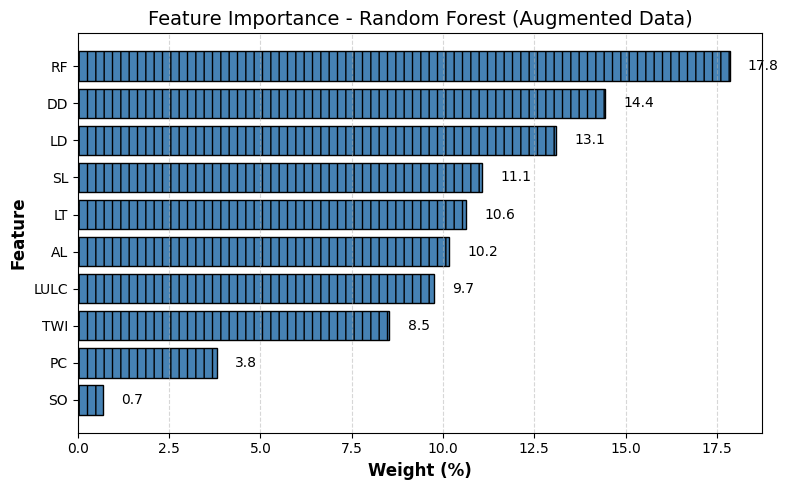

In [ ]:
import matplotlib.pyplot as plt


feature_importance_df_aug['Importance (%)'] = feature_importance_df_aug['Importance'] * 100

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(
    feature_importance_df_aug['Feature'],
    feature_importance_df_aug['Importance (%)'],
    color='steelblue',
    edgecolor='black',
    hatch='||'  # Garis vertikal di dalam bar
)


for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
            f'{width:.1f}', va='center', fontsize=10)

# Styling axis
ax.set_xlabel('Weight (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance - Random Forest (Augmented Data)', fontsize=14)
ax.invert_yaxis()  # Balik urutan biar yang terbesar di atas
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Layout
plt.tight_layout()
plt.show()


In [ ]:
# Konversi ke persen
feature_importance_df_aug['Importance (%)'] = feature_importance_df_aug['Importance'] * 100

# Export ke CSV
feature_importance_df_aug[['Feature', 'Importance (%)']].to_csv('feature_importance_rf_aug.csv', index=False)
print("✅ Feature importance saved to 'feature_importance_rf_aug.csv'")


✅ Feature importance saved to 'feature_importance_rf_aug.csv'


## Visualisasi Distribusi Spasial Hasil Augmentasi

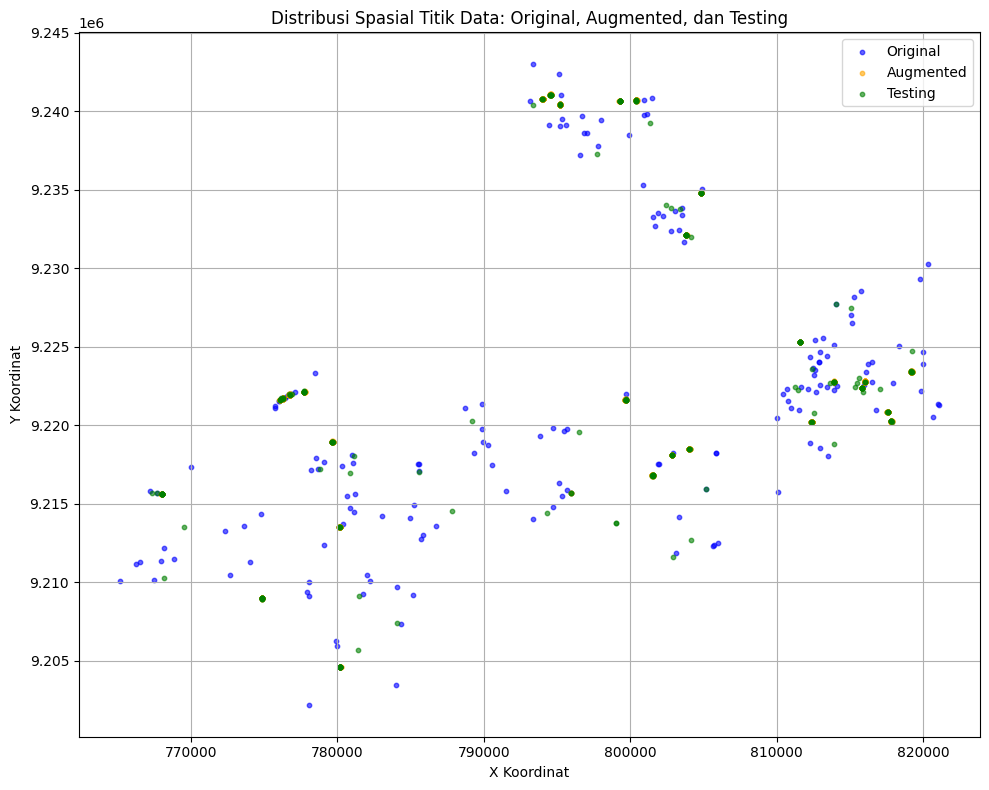

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_train = X_train.copy()
df_train['Class'] = le.inverse_transform(y_train)
df_train['augmented'] = df_full.loc[df_train.index, 'augmented'].values
df_train['X'] = df_full.loc[df_train.index, 'X'].values
df_train['Y'] = df_full.loc[df_train.index, 'Y'].values

df_test = X_test.copy()
df_test['Class'] = le.inverse_transform(y_test)
df_test['augmented'] = False
df_test['X'] = df_full.loc[df_test.index, 'X'].values
df_test['Y'] = df_full.loc[df_test.index, 'Y'].values
df_test['source'] = 'Testing'


df_train['source'] = df_train['augmented'].map(lambda x: 'Augmented' if x else 'Original')


df_vis = pd.concat([df_train, df_test], ignore_index=True)

# Visualisasi
plt.figure(figsize=(10, 8))
colors = {'Original': 'blue', 'Augmented': 'orange', 'Testing': 'green'}

for source in ['Original', 'Augmented', 'Testing']:
    subset = df_vis[df_vis['source'] == source]
    plt.scatter(subset['X'], subset['Y'], s=10, c=colors[source], label=source, alpha=0.6)

plt.title("Distribusi Spasial Titik Data: Original, Augmented, dan Testing")
plt.xlabel("X Koordinat")
plt.ylabel("Y Koordinat")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_full.describe()


,X,Y,LT,LD,RF,SL,DD,LULC,SO,AL,TWI,PC,Yields,Class
count,1134.00000,1.134000e+03,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,249.000000,1134.000000
mean,796983.75485,9.223534e+06,30.791847,60.696199,38.179945,21.814505,21.103407,9.689550,9.719259,10.363960,0.032038,0.050785,7.019478,2.465608
std,15602.16861,9.555371e+03,25.407109,27.019119,11.111238,13.189540,4.014051,3.024212,1.623932,3.686056,0.018778,0.018525,14.000637,1.107687
min,765137.00000,9.202212e+06,11.470000,18.470000,16.500900,9.484106,11.590000,5.160000,3.980000,2.830000,0.019455,0.019086,0.020000,1.000000
25%,780148.00000,9.218139e+06,15.772469,44.420445,42.243210,11.470000,20.177410,5.160000,10.180000,6.050000,0.019455,0.030000,0.410000,1.000000
50%,799702.00000,9.221732e+06,23.258385,44.655884,42.243213,15.772469,20.180000,10.480000,10.180000,9.252227,0.028616,0.052579,1.720000,2.000000
75%,812231.00000,9.225329e+06,36.084976,92.350000,45.457287,23.258385,21.712608,10.480000,10.180000,14.169722,0.030000,0.052579,7.740000,3.000000
max,821103.00000,9.242995e+06,145.360000,92.350000,82.504520,57.350000,39.410000,14.870000,10.960000,14.170000,0.100000,0.100000,120.000000,4.000000


In [ ]:
# Fitur dan target
X = df_full.drop(columns=['X', 'Y', 'Yields', 'Class', 'source'], errors='ignore')  # only numerik
y = df_full['Class']


# MODEL PREDIKSI

In [ ]:
# === 1. Siapkan fitur dari df_unl ===
X_unl = df_unl[feature_cols]

# === 2. Ambil model terbaik dari hasil augmentasi ===
rf_model_aug = best_models_aug['Random Forest']

# === 3. Prediksi kelas (encoded) dan decode ke label asli ===
y_unl_pred_enc = rf_model_aug.predict(X_unl)
y_unl_pred = le.inverse_transform(y_unl_pred_enc)

# === 4. Masukkan hasil prediksi ke dalam df_unl ===
df_unl['Predicted_Class'] = y_unl_pred

# === 5. Tampilkan ringkasan prediksi ===
print("Distribusi prediksi kelas di data unlabelled:")
print(df_unl['Predicted_Class'].value_counts().sort_index())


Distribusi prediksi kelas di data unlabelled:
Predicted_Class
1    393925
2    648343
3    354705
4    494269
Name: count, dtype: int64


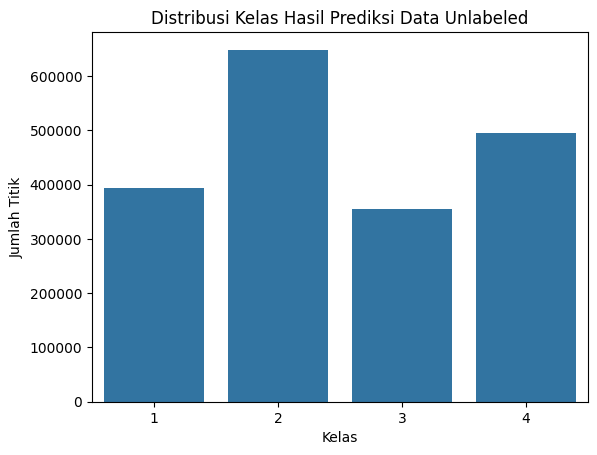

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Predicted_Class', data=df_unl)
plt.title('Distribusi Kelas Hasil Prediksi Data Unlabeled')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Titik')
plt.show()


In [ ]:
df_unl.to_csv("hasil_prediksi_unlabeled_rf_agm.csv", index=False)


In [ ]:
print(df_unl[['X', 'Y', 'Predicted_Class']].head())


            X            Y  Predicted_Class
0  805370.648  9246472.292                3
1  805340.648  9246442.292                3
2  805370.648  9246442.292                3
3  805280.648  9246412.292                3
4  805310.648  9246412.292                3


Peta

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
!pip install contextily
import contextily as ctx
import matplotlib.patches as mpatches

# Warna
color_map = {
    1: '#b44226',   # Low
    2: '#f4e500',   # Moderate
    3: '#00c443',   # High
    4: '#002776'    # Very High
}

legend_labels = [
    mpatches.Patch(color=color_map[1], label='Low'),
    mpatches.Patch(color=color_map[2], label='Moderate'),
    mpatches.Patch(color=color_map[3], label='High'),
    mpatches.Patch(color=color_map[4], label='Very High')
]



In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from shapely.geometry import Point

# === 1. Load Data Prediksi ===
df_pred = pd.read_csv('hasil_prediksi_unlabeled_rf_agm.csv')

# Buat GeoDataFrame
geometry = [Point(xy) for xy in zip(df_pred['X'], df_pred['Y'])]
gdf = gpd.GeoDataFrame(df_pred, geometry=geometry, crs='EPSG:32748')

# Grid Raster
# Tentukan resolusi grid  (30m)
resolution = 30

# bounds raster
minx, miny, maxx, maxy = gdf.total_bounds
width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)

# Buat array raster (default value = nodata -9999)
raster_array = np.full((height, width), -9999, dtype=np.int16)

# Transformasi raster
transform = from_origin(minx, maxy, resolution, resolution)

# koordinat ke grid
for _, row in gdf.iterrows():
    col = int((row.geometry.x - minx) / resolution)
    row_idx = int((maxy - row.geometry.y) / resolution)
    if 0 <= row_idx < height and 0 <= col < width:
        raster_array[row_idx, col] = row['Predicted_Class']

# Save to GeoTIFF
tif_path = "prediksi_potensi_infiltrasi.tif"
with rasterio.open(
    tif_path,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=raster_array.dtype,
    crs='EPSG:32748',
    transform=transform,
    nodata=-9999
) as dst:
    dst.write(raster_array, 1)

print(f"✅ Raster GeoTIFF saved to: {tif_path}")


In [ ]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Raster Prediksi
tif_path = "prediksi_potensi_infiltrasi.tif"
with rasterio.open(tif_path) as src:
    raster = src.read(1)
    transform = src.transform
    pixel_size = transform[0]  # Resolusi piksel (meter)
    crs = src.crs

# Hitung Luas Per Kelas
unique, counts = np.unique(raster[raster != -9999], return_counts=True)

# Hitung luas per kelas (m² → km²)
area_per_pixel_m2 = pixel_size * pixel_size
area_per_pixel_km2 = area_per_pixel_m2 / 1e6
class_areas_km2 = counts * area_per_pixel_km2

# Hitung persentase per kelas
total_area_km2 = class_areas_km2.sum()
percentages = (class_areas_km2 / total_area_km2) * 100

#DataFrame Ringkasan
summary_df = pd.DataFrame({
    'Class': unique,
    'Area (km²)': np.round(class_areas_km2, 2),
    'Percentage (%)': np.round(percentages, 2)
})


print("📊 Luas & Persentase Potensi Infiltrasi:")
print(summary_df)
summary_df.to_csv("luas_persentase_potensi_infiltrasi.csv", index=False)
print("✅ Ringkasan disimpan ke: luas_persentase_potensi_infiltrasi.csv")

# Plot Bar Chart ===
colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#225ea8']  # Sesuai kelas

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(summary_df['Class'], summary_df['Area (km²)'], color=colors, edgecolor='black')

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f} km²',
            ha='center', va='bottom', fontsize=10)

ax.set_title('Luas Kelas Potensi Infiltrasi (km²)', fontsize=14)
ax.set_xlabel('Groundwater Potential Class', fontsize=12)
ax.set_ylabel('Area (km²)', fontsize=12)
ax.set_xticks(summary_df['Class'])
ax.set_xticklabels(['Low', 'Moderate', 'High', 'Very High'])
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
